In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
import importlib
import clean_openaq as oaq
importlib.reload(oaq)

<module 'clean_openaq' from '/home/dchen/git/hub/openaq-april2019-datadive/analysis/avg_yearly_pm25_by_ctry/clean_openaq.py'>

# 2019

```sql
SELECT *
FROM fetches
WHERE date.utc
    BETWEEN '2019-01-01'
        AND '2019-12-31'
        AND parameter = 'pm25'
;
```

In [71]:
y2019 = pd.read_csv('../../data/5ec3d8b2-5b40-40b3-8eb0-343c6d257687.csv',
                    #nrows=10000
                    )

In [72]:
y2019 = oaq.clean_oaq(y2019)
global_avg = y2019.value.mean()

y2019_agg = oaq.analyze_yearly_country_value(y2019)

In [73]:
del(y2019)

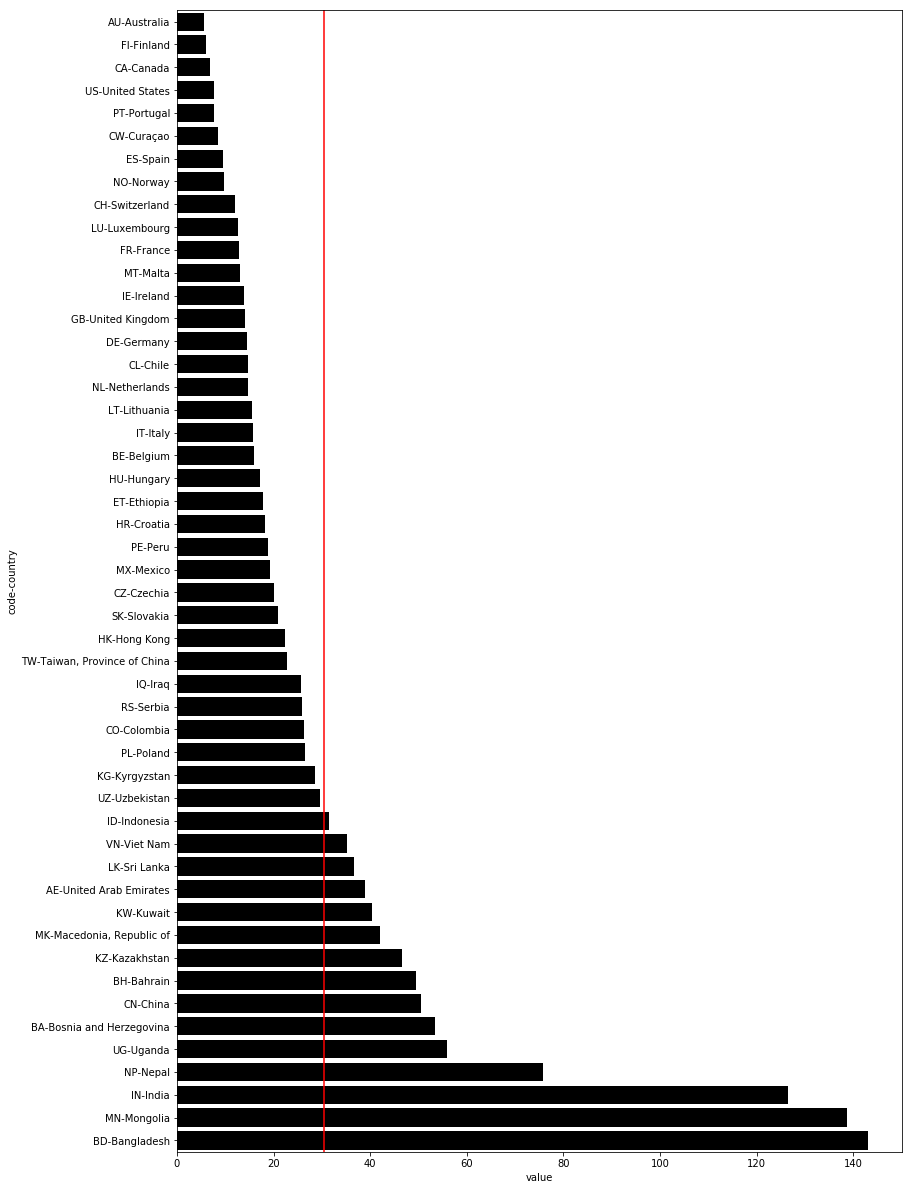

In [74]:
oaq.plot_year_agg(y2019_agg, global_avg)

# 2018

```sql
SELECT *
FROM fetches
WHERE date.utc
    BETWEEN '2018-01-01'
        AND '2018-12-31'
        AND parameter = 'pm25'
;
```

In [75]:
y2018 = pd.read_csv('../../data/2018_4839c8a4-960f-4f97-941a-89987510a3f4.csv',
                    #nrows=10000
                    )

In [76]:
y2018 = oaq.clean_oaq(y2018)
global_avg_2018 = y2018.value.mean()

y2018_agg = oaq.analyze_yearly_country_value(y2018)

In [77]:
del(y2018)

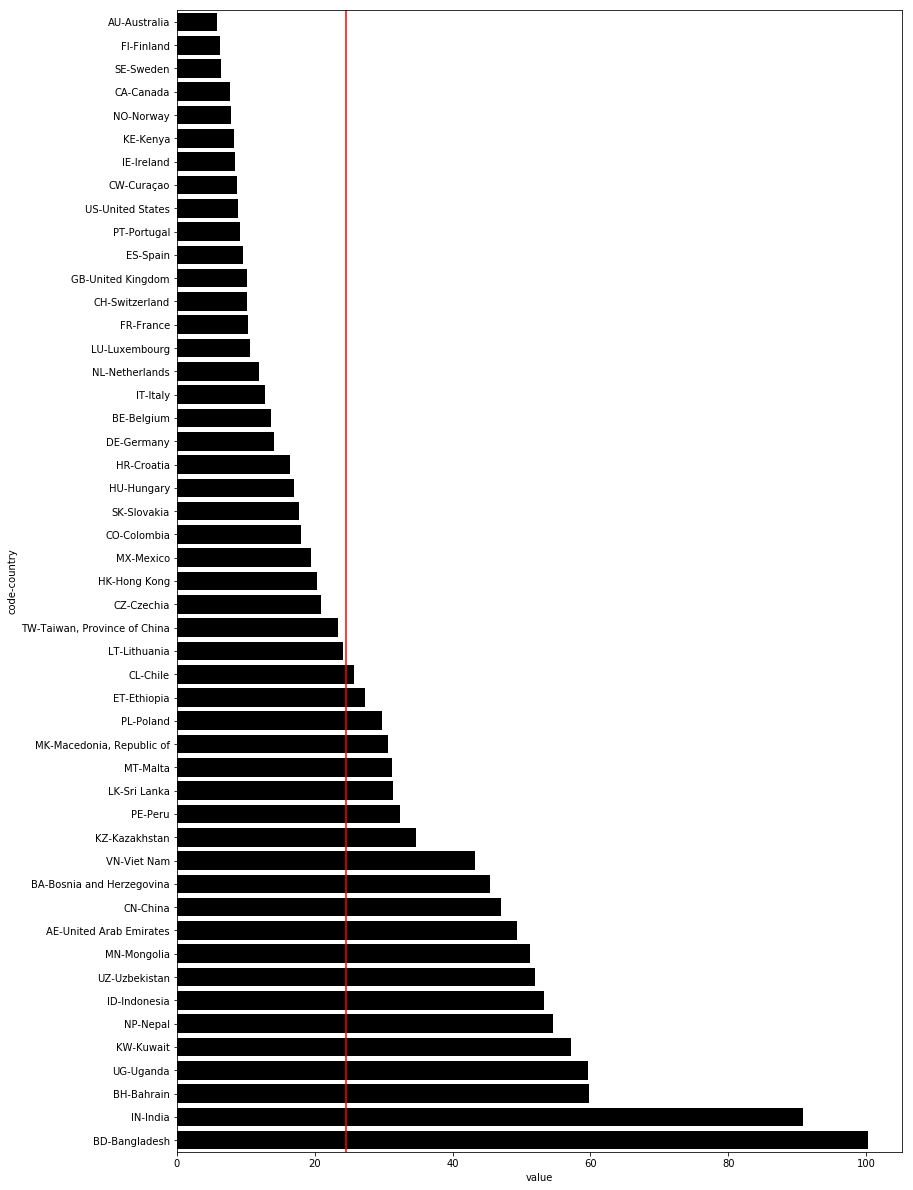

In [78]:
oaq.plot_year_agg(y2018_agg, global_avg_2018)

# 2017

```sql
SELECT *
FROM fetches
WHERE date.utc
    BETWEEN '2017-01-01'
        AND '2017-12-31'
        AND parameter = 'pm25'
;
```

In [85]:
y2017 = pd.read_csv('../../data/2017_97f14e2c-7dfc-4317-8670-af4cb66293b6.csv',
                    #nrows=10000
                    )

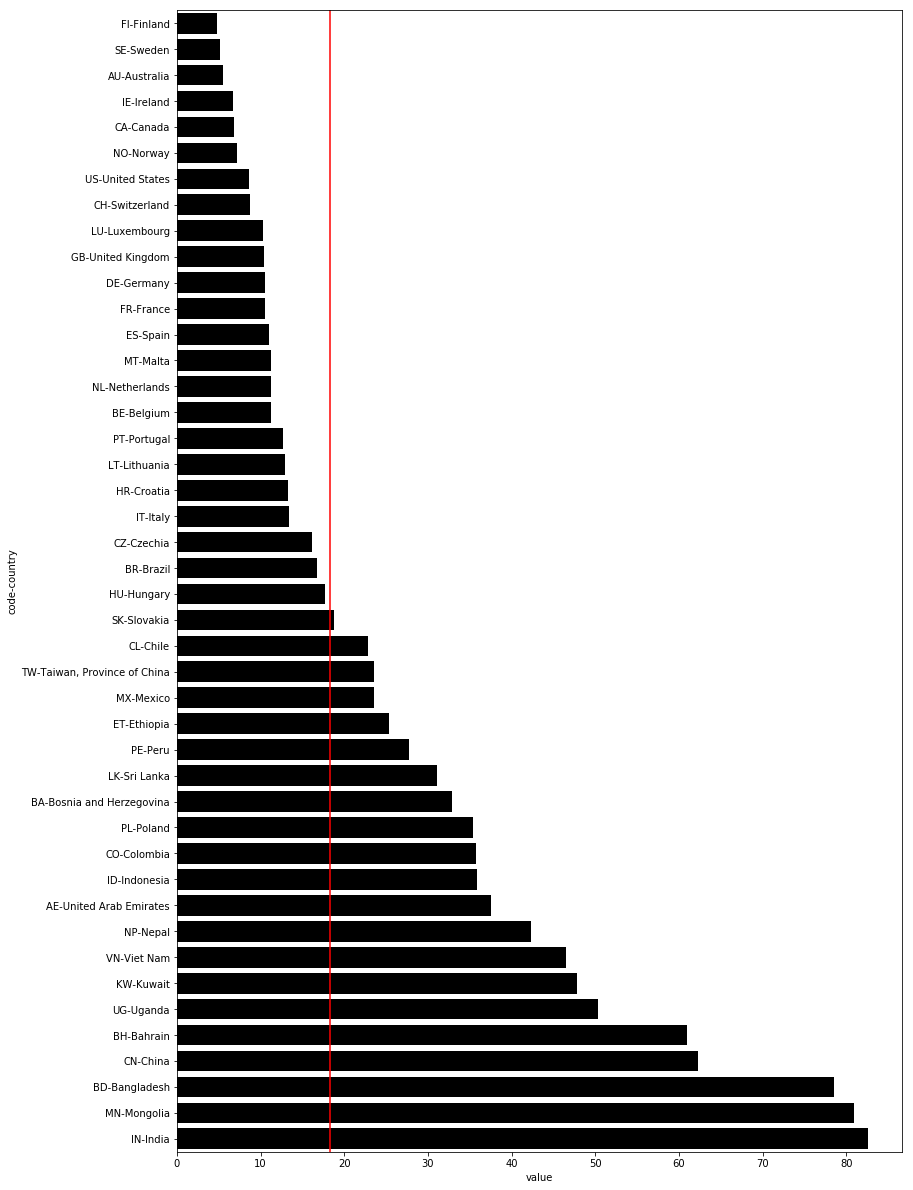

In [86]:
y2017 = oaq.clean_oaq(y2017)
global_avg_2017 = y2017.value.mean()

y2017_agg = oaq.analyze_yearly_country_value(y2017)
del(y2017)
oaq.plot_year_agg(y2017_agg, global_avg_2017)

# 2016

```sql
SELECT *
FROM fetches
WHERE date.utc
    BETWEEN '2016-01-01'
        AND '2016-12-31'
        AND parameter = 'pm25'
;
```

In [155]:
y2016 = pd.read_csv('../../data/2016_9f7fd765-8b79-406a-b000-be1c7f5ecc12.csv',
                    #nrows=10000
                    )

/home/dchen/anaconda3/envs/openaq/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


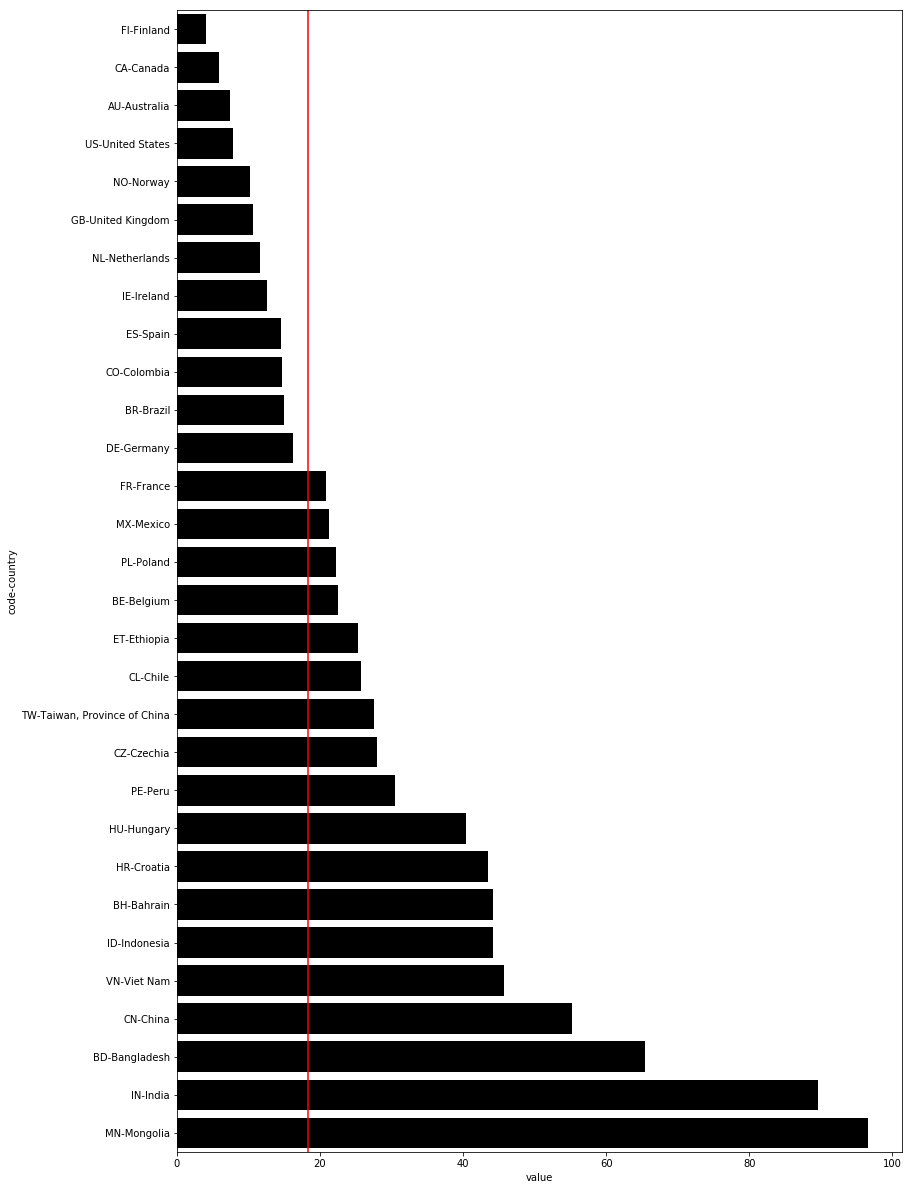

In [156]:
y2016 = oaq.clean_oaq(y2016)
global_avg_2016 = y2016.value.mean()

y2016_agg = oaq.analyze_yearly_country_value(y2016)
del(y2016)
oaq.plot_year_agg(y2016_agg, global_avg_2017)

# 2016 - 2019

Looking at overall unadjusted trends from 2017 to 2019 

### Global pm2.5 values

In [157]:
global_avgs = pd.DataFrame({
    'year': [2016, 2017, 2018, 2019],
    'pm25_avg': [global_avg_2016, global_avg_2017, global_avg_2018, global_avg]
})

In [158]:
global_avgs

,year,pm25_avg
0,2016,16.599377
1,2017,18.333580
2,2018,24.499493
3,2019,30.348122


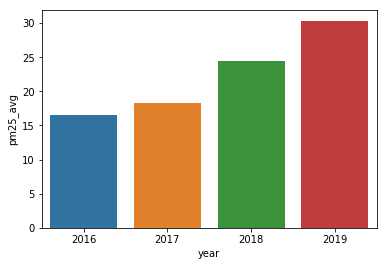

In [159]:
sns.barplot(x='year', y='pm25_avg', data=global_avgs)

### Country Rankings

In [160]:
y2019_agg['year'] = 2019
y2018_agg['year'] = 2018
y2017_agg['year'] = 2017
y2016_agg['year'] = 2016

In [182]:
top_offenders_n = 10

worst_offenders = pd.DataFrame({
    'y2016': y2016_agg.tail(top_offenders_n).reset_index()['code-country'],
    'y2017': y2017_agg.tail(top_offenders_n).reset_index()['code-country'],
    'y2018': y2018_agg.tail(top_offenders_n).reset_index()['code-country'],
    'y2019': y2019_agg.tail(top_offenders_n).reset_index()['code-country'],
})

# flip the rows so the "worst" country is on top
#worst_offenders = worst_offenders.iloc[::-1].reset_index(drop=True)
#worst_offenders

In [183]:
import numpy as np
worst_offenders['rank'] = np.array(range(len(worst_offenders))) + 1

In [184]:
worst_offenders_long = worst_offenders.melt(id_vars='rank', var_name='year', value_name='country')
worst_offenders_long['year'] = worst_offenders_long['year'].apply(lambda x: x.replace('y', ''))

In [186]:
worst_offenders

,y2016,y2017,y2018,y2019,rank
0,PE-Peru,AE-United Arab Emirates,AE-United Arab Emirates,"MK-Macedonia, Republic of",1
1,HU-Hungary,NP-Nepal,MN-Mongolia,KZ-Kazakhstan,2
2,HR-Croatia,VN-Viet Nam,UZ-Uzbekistan,BH-Bahrain,3
3,BH-Bahrain,KW-Kuwait,ID-Indonesia,CN-China,4
4,ID-Indonesia,UG-Uganda,NP-Nepal,BA-Bosnia and Herzegovina,5
5,VN-Viet Nam,BH-Bahrain,KW-Kuwait,UG-Uganda,6
6,CN-China,CN-China,UG-Uganda,NP-Nepal,7
7,BD-Bangladesh,BD-Bangladesh,BH-Bahrain,IN-India,8
8,IN-India,MN-Mongolia,IN-India,MN-Mongolia,9
9,MN-Mongolia,IN-India,BD-Bangladesh,BD-Bangladesh,10


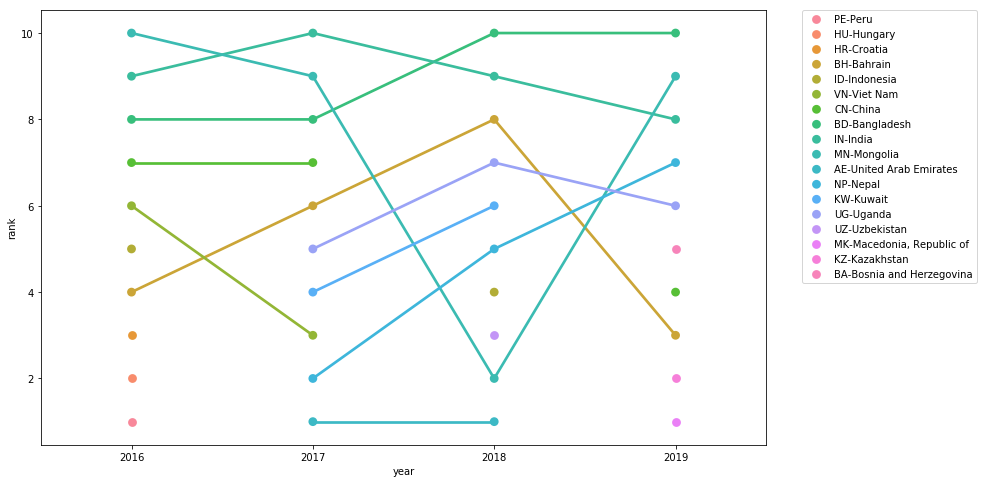

In [188]:
fig, ax = plt.subplots(1, 1, figsize=[13, 8])
sns.pointplot(x='year', y='rank', data=worst_offenders_long, hue='country', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [190]:
worst_offenders.to_csv('./worst_offenders.csv', index=False)